# Regression

A regression is a statistical technique that relates a dependent variable to one or more independent (explanatory) variables.

## Regression vs Classification

Classification predictive modeling problems are different from regression predictive modeling problems.

Classification is the task of predicting a discrete class label.<br>
Regression is the task of predicting a continuous quantity.
<br>There is some overlap between the algorithms for classification and regression; for example:

- A classification algorithm may predict a continuous value, but the continuous value is in the form of a probability for a class label.
- A regression algorithm may predict a discrete value, but the discrete value in the form of an integer quantity.<br>

Some algorithms can be used for both classification and regression with small modifications, such as decision trees and artificial neural networks. Some algorithms cannot, or cannot easily be used for both problem types, such as linear regression for regression predictive modeling and logistic regression for classification predictive modeling.

Importantly, the way that we evaluate classification and regression predictions varies and does not overlap, for example:

- Classification predictions can be evaluated using accuracy, whereas regression predictions cannot.
- Regression predictions can be evaluated using root mean squared error, whereas classification predictions cannot.

# Linear Regression

**Linear regression** is a type of **supervised machine learning algorithm** that computes the linear relationship between a dependent variable and one or more independent features. When the number of the independent feature, is 1 then it is known as _Univariate Linear regression_, and in the case of more than one feature, it is known as _multivariate linear regression_. The goal of the algorithm is to find the *best linear equation that can predict the value of the dependent variable based on the independent variables*. The equation provides a straight line that represents the relationship between the dependent and independent variables. The slope of the line indicates how much the dependent variable changes for a unit change in the independent variable(s).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [3]:
data = pd.read_csv("Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
data.shape

(30, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Handling Null Values

In [9]:
data.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [10]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

This implies that there are no null values in the dataset.

## Separation of Dependent and Independent varaibles

We can see that here are only two columns. It can be observed that _Salary_ is the dependent variable and _YearsExperience_ is the independent variable.

In [11]:
x = data.iloc[:,:1]
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [18]:
y = data["Salary"]
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [19]:
print("Shape of x is:", x.shape)
print("Shape of y is:", y.shape)

Shape of x is: (30, 1)
Shape of y is: (30,)


Text(0, 0.5, 'y')

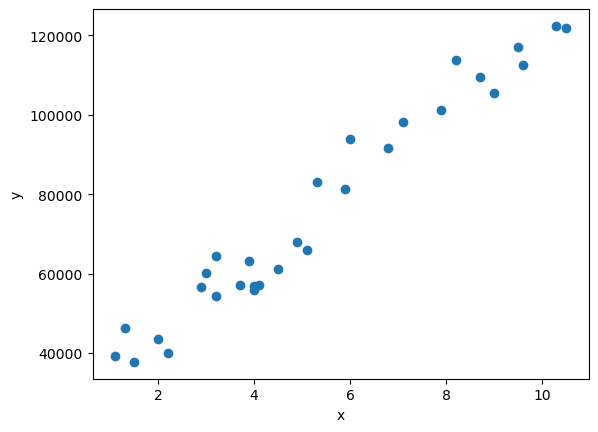

In [20]:
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")

We can see that there is a linear relation between the two variables.

In [22]:
print("Type of x:", type(x))
print("Type of y:", type(y))

Type of x: <class 'pandas.core.frame.DataFrame'>
Type of y: <class 'pandas.core.series.Series'>


We have to make sure that the dependent variable must be a 1D entity and the independent variable must be a 2D entity.

## Splitting the data into Train and Test sets

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (24, 1)
Shape of x_test: (6, 1)
Shape of y_train: (24,)
Shape of y_test: (6,)


## Building the Model

Steps to build the model/algorithm
1. Train the model using train set
2. Test the model on test set
3. Evaluating the model

### Training the model

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [28]:
lr.coef_

array([9312.57512673])

In [29]:
lr.intercept_

26780.09915062818

The above are the coefficient and intercept values in _y=mx+c_
Hence the linear regression equation is _y = 9312.57512673x + 26780.09915062818_

### Testing the model

In [30]:
y_pred = lr.predict(x_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [31]:
y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
Name: Salary, dtype: float64

### Evaluating the model

In [34]:
from sklearn.metrics import r2_score
print("The accuracy of the model is", r2_score(y_test, y_pred))

The accuracy of the model is 0.988169515729126


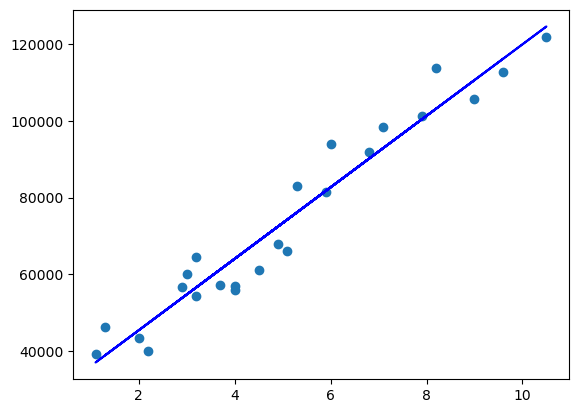

In [38]:
plt.scatter(x_train, y_train)
plt.plot(x_train, lr.predict(x_train), color = "blue")

plt.show()

This plot shows the train data. The line shows what the model has predicted.

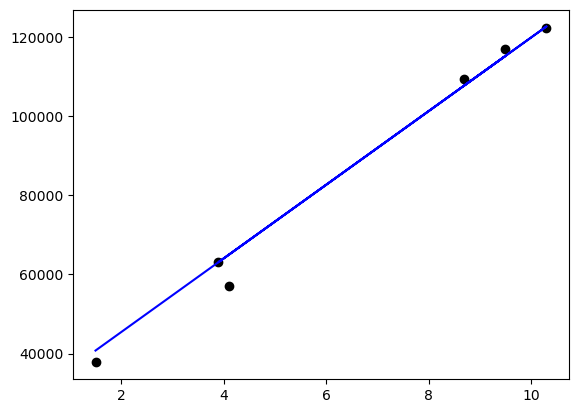

In [37]:
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_pred, color="blue")

plt.show()

This plot shows the test data. The line shows what the model has predicted.